<a href="https://colab.research.google.com/github/Rakeshavs/Big-basket-Apriorit-prediction/blob/main/facebook_ads_predicition_using_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upper Confidence Bound**


Loading the Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the Dataset


In [2]:
dataset = pd.read_excel('/content/Facebookads.xlsx')

Implmentation

In [3]:
import math as m
import pandas as pd


T = 15000
num_ads = 10
ads_selected = []

number_of_selections = [0] * num_ads
sum_of_rewards = [0] * num_ads
total_rewards = 0

for n in range(0, T):
    ad = 0
    max_upper_confidence_bound = 0
    for i in range(0, num_ads):
        if (number_of_selections[i] > 0):
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = m.sqrt(3/2 * (m.log(n + 1) / number_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e300
        if upper_bound > max_upper_confidence_bound:
            max_upper_confidence_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    temp_reward = dataset.iloc[n, ad]
    sum_of_rewards[ad] += temp_reward
    total_rewards += temp_reward


Histrogram Visualization

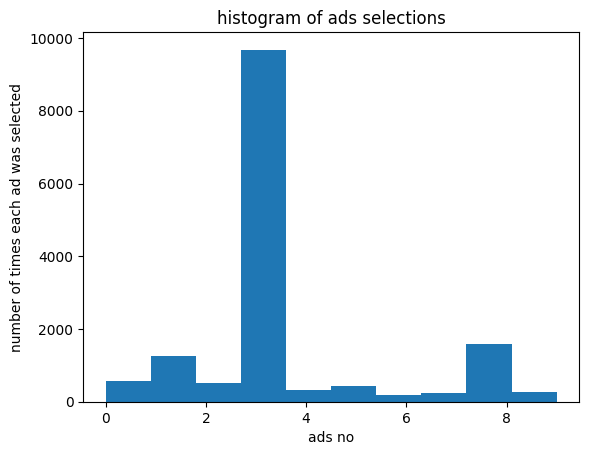

In [4]:
plt.hist(ads_selected)
plt.title('histogram of ads selections')
plt.xlabel('ads no')
plt.ylabel('number of times each ad was selected')
plt.show()

# Thomson Sampling Algorithm

In [6]:
# Thompson Sampling Algorithm
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_excel('/content/Facebookads.xlsx')  # Make sure this file exists

# Number of rounds and ads
T = 10000
num_ads = 10

# Variables for Thompson Sampling
ads_selected = []
num_of_rewards_1 = [0] * num_ads
num_of_rewards_0 = [0] * num_ads
total_rewards = 0

# Thompson Sampling process
for n in range(0, T):
    ad = 0
    max_random = 0
    for i in range(0, num_ads):
        random_beta = random.betavariate(num_of_rewards_1[i] + 1, num_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        num_of_rewards_1[ad] += 1
    else:
        num_of_rewards_0[ad] += 1
    total_rewards += reward



# Visualizing the graph

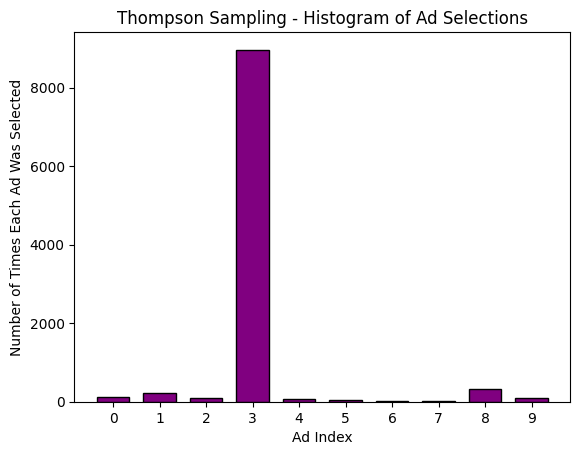

Total Reward using Thompson Sampling: 2509


In [8]:

# Visualizing results
plt.hist(ads_selected, bins=range(num_ads + 1), edgecolor='black', align='left', rwidth=0.7, color='purple')
plt.title('Thompson Sampling - Histogram of Ad Selections')
plt.xlabel('Ad Index')
plt.ylabel('Number of Times Each Ad Was Selected')
plt.xticks(range(num_ads))
plt.show()

# Total reward
print("Total Reward using Thompson Sampling:", total_rewards)